# Project : Child Mind Institute - Problematic Internet Use

In [2]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [4]:
# Remove rows where 'sii' is null
train_df = train_df.dropna(subset=['sii'])

In [5]:
train_df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0


In [6]:
test_df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 0 to 3958
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      2736 non-null   object 
 1   Basic_Demos-Enroll_Season               2736 non-null   object 
 2   Basic_Demos-Age                         2736 non-null   int64  
 3   Basic_Demos-Sex                         2736 non-null   int64  
 4   CGAS-Season                             2342 non-null   object 
 5   CGAS-CGAS_Score                         2342 non-null   float64
 6   Physical-Season                         2595 non-null   object 
 7   Physical-BMI                            2527 non-null   float64
 8   Physical-Height                         2530 non-null   float64
 9   Physical-Weight                         2572 non-null   float64
 10  Physical-Waist_Circumference            483 non-null    float64
 

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      20 non-null     object 
 1   Basic_Demos-Enroll_Season               20 non-null     object 
 2   Basic_Demos-Age                         20 non-null     int64  
 3   Basic_Demos-Sex                         20 non-null     int64  
 4   CGAS-Season                             10 non-null     object 
 5   CGAS-CGAS_Score                         8 non-null      float64
 6   Physical-Season                         14 non-null     object 
 7   Physical-BMI                            13 non-null     float64
 8   Physical-Height                         13 non-null     float64
 9   Physical-Weight                         13 non-null     float64
 10  Physical-Waist_Circumference            5 non-null      float64


### Custom Type Of Feature

In [10]:
# feature category
features = ["Basic_Demos-Sex","FGC-FGC_CU_Zone","FGC-FGC_GSND_Zone","FGC-FGC_GSD_Zone","FGC-FGC_PU_Zone","FGC-FGC_SRL_Zone","FGC-FGC_SRR_Zone","FGC-FGC_TL_Zone",
            "BIA-BIA_Activity_Level_num","BIA-BIA_Frame_num","PCIAT-PCIAT_01","PCIAT-PCIAT_02","PCIAT-PCIAT_03","PCIAT-PCIAT_04","PCIAT-PCIAT_05","PCIAT-PCIAT_06",
            "PCIAT-PCIAT_07","PCIAT-PCIAT_08","PCIAT-PCIAT_09","PCIAT-PCIAT_10","PCIAT-PCIAT_11","PCIAT-PCIAT_12","PCIAT-PCIAT_13","PCIAT-PCIAT_14","PCIAT-PCIAT_15",
            "PCIAT-PCIAT_16","PCIAT-PCIAT_17","PCIAT-PCIAT_18","PCIAT-PCIAT_19","PCIAT-PCIAT_20","PreInt_EduHx-computerinternet_hoursday"]
def convert_cate(df, features):
    for i in features:
        if i in df.columns:
            df[i] = df[i].astype("category")
convert_cate(test_df, features)
convert_cate(train_df, features) 

In [11]:
# feature float64
features = ["Basic_Demos-Age","Physical-BMI","Physical-Height","Physical-Weight","FGC-FGC_GSND","FGC-FGC_GSD","FGC-FGC_SRL","FGC-FGC_SRR","BIA-BIA_BMC",
           "BIA-BIA_BMI","BIA-BIA_BMR","BIA-BIA_DEE","BIA-BIA_ECW","BIA-BIA_FFM","BIA-BIA_FFMI","BIA-BIA_FMI","BIA-BIA_Fat","BIA-BIA_ICW","BIA-BIA_LDM",
           "BIA-BIA_LST","BIA-BIA_SMM","BIA-BIA_TBW","PAQ_A-PAQ_A_Total","PAQ_C-PAQ_C_Total","CGAS-CGAS_Score","Physical-Waist_Circumference","Physical-Diastolic_BP",
           "Physical-HeartRate","Physical-Systolic_BP","Fitness_Endurance-Max_Stage","Fitness_Endurance-Time_Mins","Fitness_Endurance-Time_Sec","FGC-FGC_CU","FGC-FGC_PU",
           "FGC-FGC_TL","PCIAT-PCIAT_Total","SDS-SDS_Total_Raw","SDS-SDS_Total_T"]
def convert_float(df, features):
    for i in features:
        if i in df.columns:
            df[i] = df[i].astype("float64")
convert_float(test_df, features)
convert_float(train_df, features) 

In [12]:
# feature string
features = ["id","Basic_Demos-Enroll_Season","CGAS-Season","Physical-Season","FGC-Season","BIA-Season","PAQ_A-Season","PAQ_C-Season","PCIAT-Season","SDS-Season","PreInt_EduHx-Season"]
def convert_string(df, features):
    for i in features:
        if i in df.columns:
            df[i] = df[i].astype("string")
convert_string(test_df, features)
convert_string(train_df, features) 

# Distribution of Numerical Feature

In [14]:
train_df.describe()

,Basic_Demos-Age,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,...,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-PAQ_A_Total,PAQ_C-PAQ_C_Total,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,sii
count,2736.000000,2342.000000,2527.000000,2530.000000,2572.000000,483.000000,2478.000000,2486.000000,2478.000000,731.000000,...,1813.000000,1813.000000,1813.000000,1813.000000,363.000000,1440.000000,2736.000000,2527.000000,2525.000000,2736.000000
mean,10.238670,65.159266,19.125667,55.897051,87.839592,26.625259,69.755044,81.823411,117.127926,5.001368,...,20.061121,67.023130,34.372294,53.916500,2.185758,2.590608,27.896199,40.977839,57.647525,0.580409
std,3.427982,11.811050,4.909305,7.394938,43.353079,5.230213,13.790203,13.769816,17.221707,2.016711,...,73.538391,113.554916,87.917006,135.377293,0.815263,0.786610,20.338853,10.231384,13.042815,0.771122
min,5.000000,25.000000,0.000000,36.000000,0.000000,19.000000,11.000000,27.000000,49.000000,0.000000,...,4.635810,23.620100,11.382500,20.589200,0.660000,0.580000,0.000000,17.000000,38.000000,0.000000
25%,8.000000,59.000000,15.773447,50.050000,57.200000,23.000000,61.000000,73.000000,107.000000,4.000000,...,12.922700,45.058000,21.124400,35.770900,1.520000,2.020000,12.000000,33.000000,47.000000,0.000000
50%,10.000000,65.000000,17.819010,55.000000,75.800000,26.000000,68.000000,81.000000,114.000000,5.000000,...,16.282800,56.429100,27.193500,44.721300,2.080000,2.550000,26.000000,39.000000,55.000000,0.000000
75%,12.000000,75.000000,21.172311,61.750000,111.450000,29.000000,76.000000,91.000000,125.000000,6.000000,...,21.852200,75.811300,37.504700,59.619300,2.780000,3.160000,41.000000,46.000000,64.000000,1.000000
max,22.000000,95.000000,46.102914,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,28.000000,...,3108.170000,4683.710000,3607.690000,5690.910000,4.540000,4.790000,93.000000,96.000000,100.000000,3.000000


# Distribution of Category Feature

In [16]:
train_df.describe(include = ['category'])

,Basic_Demos-Sex,FGC-FGC_CU_Zone,FGC-FGC_GSND_Zone,FGC-FGC_GSD_Zone,FGC-FGC_PU_Zone,FGC-FGC_SRL_Zone,FGC-FGC_SRR_Zone,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_Frame_num,...,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PreInt_EduHx-computerinternet_hoursday
count,2736,1884.0,864.0,864.0,1875.0,1877.0,1879.0,1885.0,1813.0,1813.0,...,2731.0,2729.0,2732.0,2730.0,2728.0,2725.0,2728.0,2730.0,2733.0,2654.0
unique,2,2.0,3.0,3.0,2.0,2.0,2.0,2.0,5.0,3.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0
top,0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,1739,989.0,511.0,525.0,1224.0,1195.0,1192.0,1457.0,636.0,868.0,...,2141.0,999.0,1285.0,951.0,937.0,791.0,824.0,1119.0,1248.0,1268.0


# 2. Exploratory Data Analysis(EDA)
## Target Variable "sii"  (Severity Impairment Index)
## 2.1. EDA for Categorical Features

In [18]:
    train_df["sii"].value_counts(normalize = True).to_frame()


,proportion
sii,
0.0,0.582602
1.0,0.266813
2.0,0.138158
3.0,0.012427


In [19]:
#Percent of sii value

##### sii: 0: None, 1: Mild, 2: Moderate, 3 : Severe

### Sex

In [22]:
    train_df["Basic_Demos-Sex"].value_counts(normalize = True).to_frame()


,proportion
Basic_Demos-Sex,
0,0.635599
1,0.364401


##### Basic_Demos-Sex: 0 : Male, 1 : Female

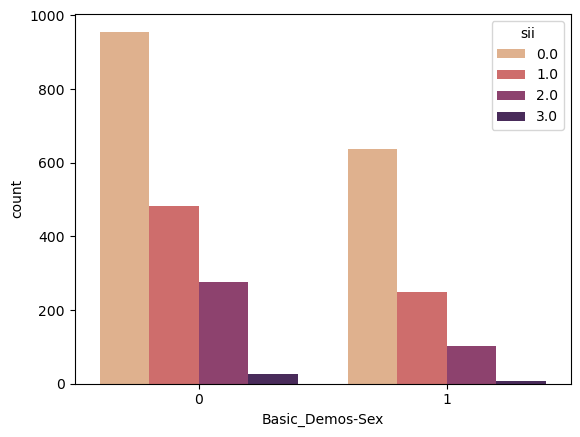

In [24]:
sns.countplot(data = train_df, x = "Basic_Demos-Sex", hue ="sii",  palette = "flare");

- From my perspective, Male tend to be more addicted to the internet than girls.

- Remaining Categorical Feature Column 

In [27]:
#Statistical chart of the influence of data types categories on sii

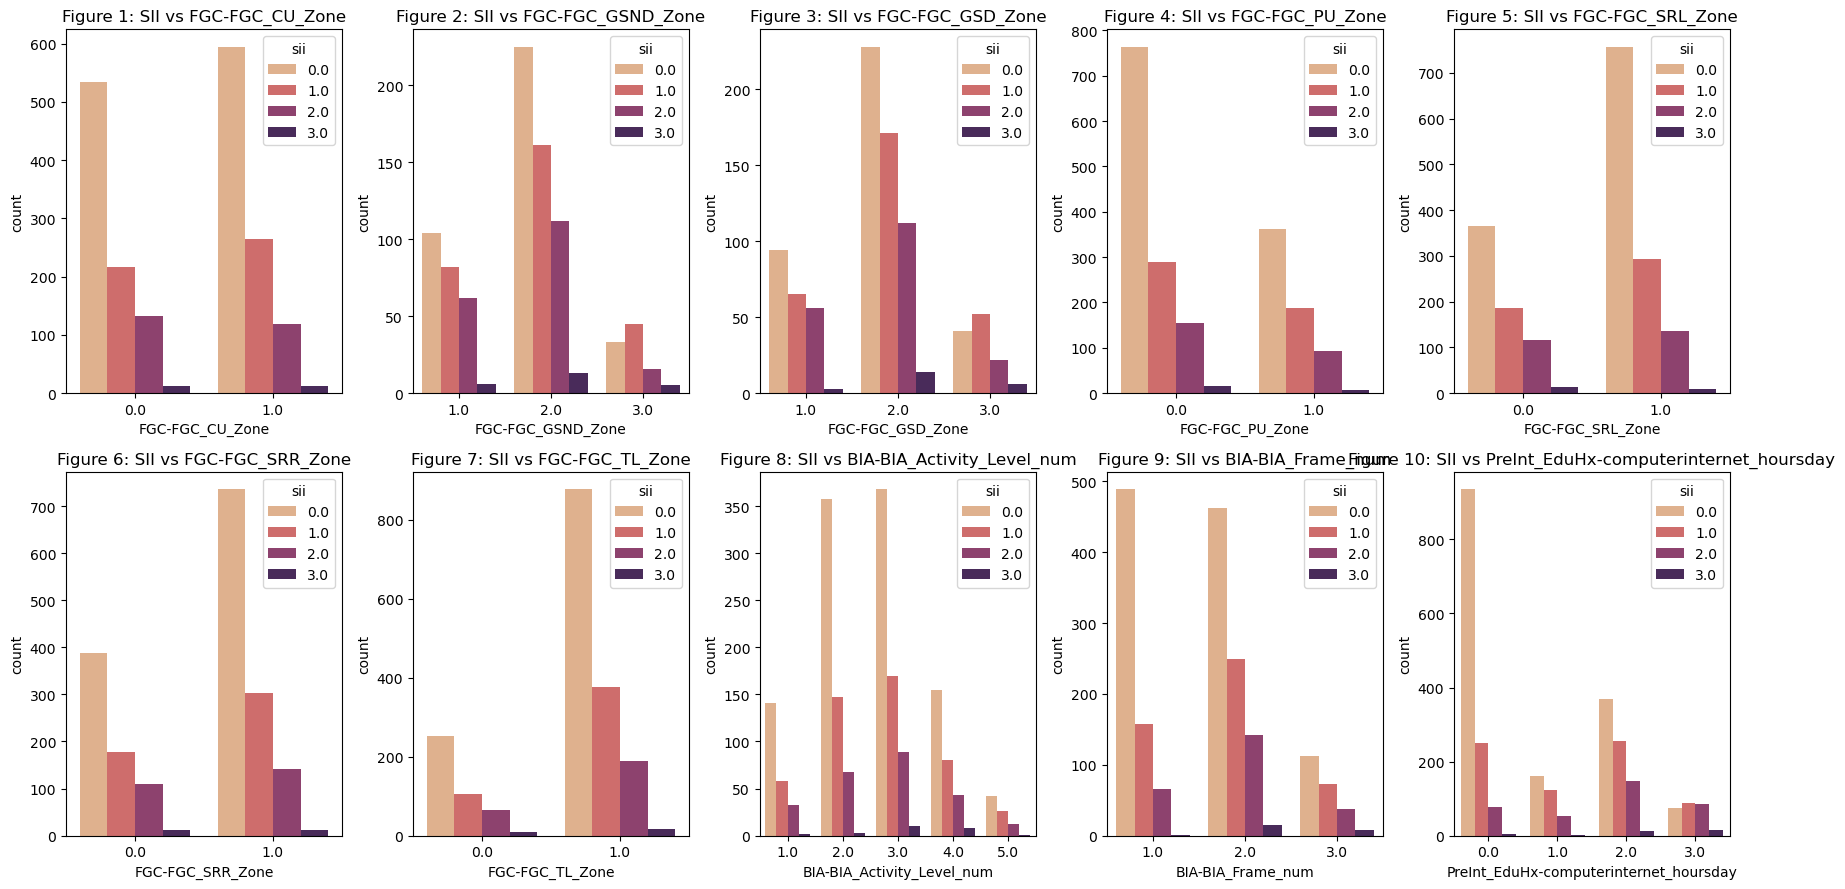

In [28]:
cols = ["FGC-FGC_CU_Zone","FGC-FGC_GSND_Zone","FGC-FGC_GSD_Zone","FGC-FGC_PU_Zone","FGC-FGC_SRL_Zone","FGC-FGC_SRR_Zone","FGC-FGC_TL_Zone",
            "BIA-BIA_Activity_Level_num","BIA-BIA_Frame_num","PreInt_EduHx-computerinternet_hoursday"]
n_rows = 2
n_cols = 5

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.5, n_rows * 4.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c# index to loop through lis cols
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data = train_df, x = cols[i], hue = "sii", palette = "flare", ax = ax_i)
            ax_i.set_title(f'Figure {i+1}: SII vs {cols[i]}')
plt.tight_layout()
plt.show()


##### FGC-FGC_CU_Zone(Curl up fitness zone): 0=Needs Improvement, 1=Healthy Fitness Zone
##### FGC-FGC_GSND_Zone(Grip Strength fitness zone (non-dominant)): 1=Weak, 2=Normal, 3=Strong
##### FGC-FGC_GSD_Zone(Grip Strength fitness zone (dominant)): 1=Weak, 2=Normal, 3=Strong
##### FGC-FGC_PU_Zone(Push-up fitness zone): 0=Needs Improvement, 1=Healthy Fitness Zone
##### FGC-FGC_SRL_Zone(Sit & Reach fitness zone (left side)): 0=Needs Improvement, 1=Healthy Fitness Zone
##### FGC-FGC_SRR_Zone(Sit & Reach fitness zone (left side)): 0=Needs Improvement, 1=Healthy Fitness Zone
##### FGC-FGC_TL_Zone(Trunk lift fitness zone): 0=Needs Improvement, 1=Healthy Fitness Zone
##### BIA-BIA_Activity_Level_num(Activity Level): 1=Very Light, 2=Light, 3=Moderate, 4=Heavy, 5=Exceptional
##### BIA-BIA_Frame_num(Body Frame): 1=Small, 2=Medium, 3=Large
##### PreInt_EduHx-computerinternet_hoursday(Hours of using computer/internet): 0=Less than 1h/day, 1=Around 1h/day, 2=Around 2hs/day, 3=More than 3hs/day



## 2.1. EDA for Numerical Features

- Age 

<Axes: xlabel='Basic_Demos-Age', ylabel='Count'>

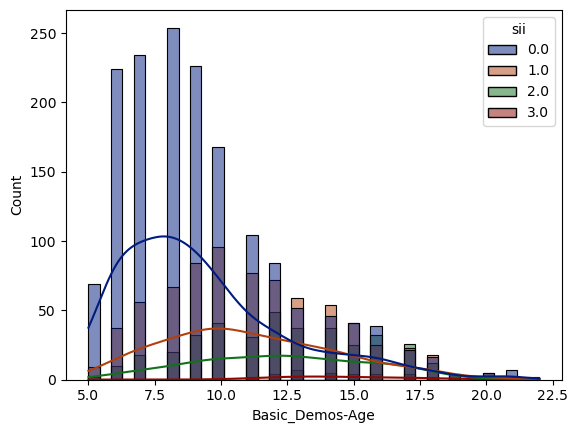

In [32]:
sns.histplot(data = train_df, x = "Basic_Demos-Age", hue = "sii", palette = "dark", bins = 40, kde = True)

- sii = 0 ,From the chart, it can be seen that for the age group from 5 to 12, sii equals 0 is quite high, the highest is at 8 years old, showing that at this age, children tend not to use the internet more. As for the age group from 12 to 22, sii equals 0 tends to decrease and sii index increases.
- sii = 1,2,3 ,The remaining hunger for sii = 1,2,3 will tend to increase at the age group from 12 to 15,the highest of sii = 1 is at 13 - 14 years old, the highest of sii = 2 is at 17 years old, showing that the level of internet use at this age group is quite high.

- Classify levels for numerical features

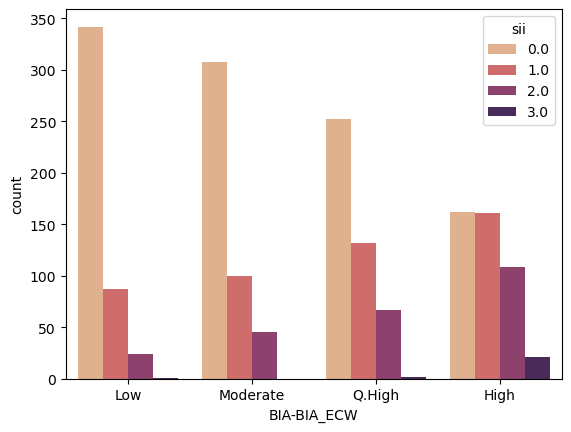

In [35]:
ECW_categories = ['Low', 'Moderate', 'Q.High', 'High']
quartile_data = pd.qcut(train_df["BIA-BIA_ECW"], 4, labels = ECW_categories)
sns.countplot(x = quartile_data, hue = train_df["sii"], palette = "flare");

- Representing interaction levels through diagrams for numerical feature data types

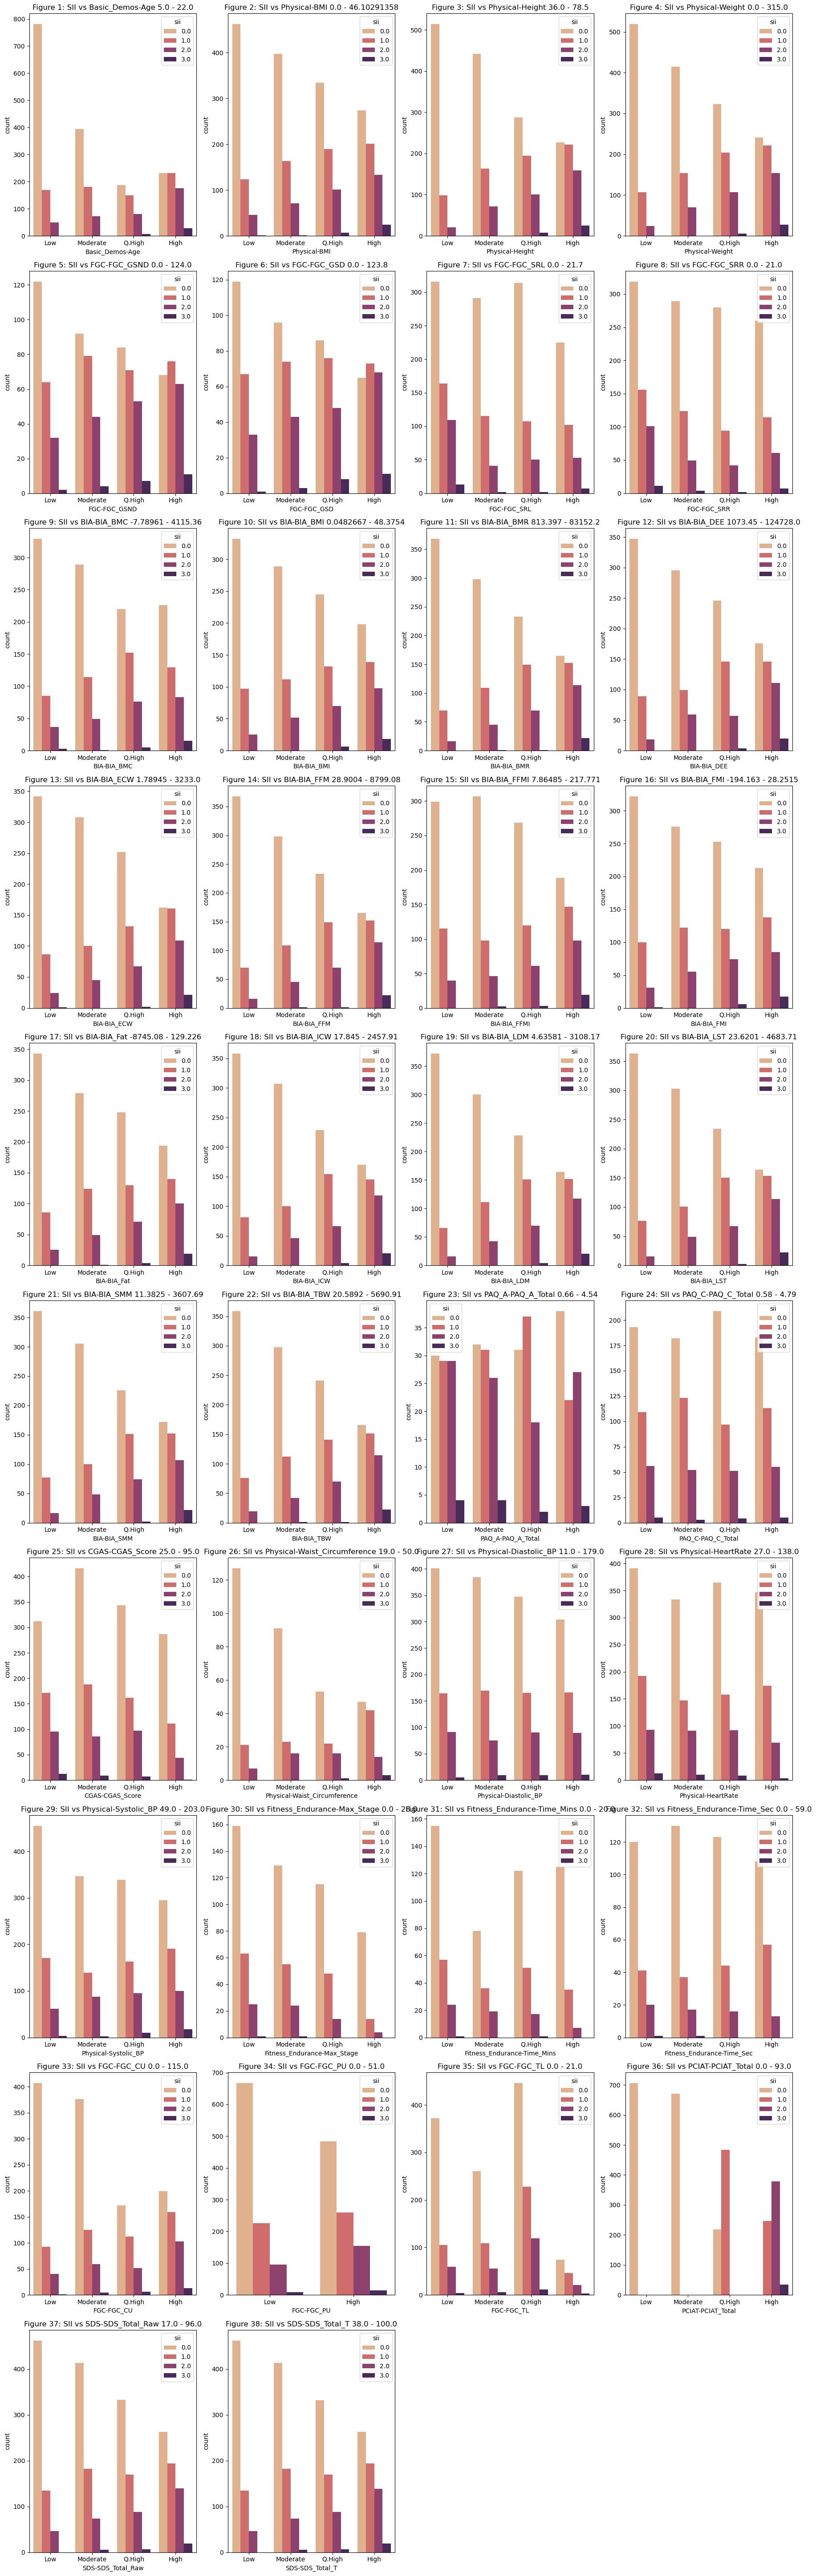

In [37]:
num_features = ["Basic_Demos-Age","Physical-BMI","Physical-Height","Physical-Weight","FGC-FGC_GSND","FGC-FGC_GSD","FGC-FGC_SRL","FGC-FGC_SRR","BIA-BIA_BMC",
           "BIA-BIA_BMI","BIA-BIA_BMR","BIA-BIA_DEE","BIA-BIA_ECW","BIA-BIA_FFM","BIA-BIA_FFMI","BIA-BIA_FMI","BIA-BIA_Fat","BIA-BIA_ICW","BIA-BIA_LDM",
           "BIA-BIA_LST","BIA-BIA_SMM","BIA-BIA_TBW","PAQ_A-PAQ_A_Total","PAQ_C-PAQ_C_Total","CGAS-CGAS_Score","Physical-Waist_Circumference","Physical-Diastolic_BP",
           "Physical-HeartRate","Physical-Systolic_BP","Fitness_Endurance-Max_Stage","Fitness_Endurance-Time_Mins","Fitness_Endurance-Time_Sec","FGC-FGC_CU","FGC-FGC_PU",
           "FGC-FGC_TL","PCIAT-PCIAT_Total","SDS-SDS_Total_Raw","SDS-SDS_Total_T"]
num_categories = ['Low', 'Moderate', 'Q.High', 'High']
n_rows = 10
n_cols = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols * 4.5, n_rows * 5.8))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c# index to loop through lis cols
        if i < len(num_features):
            ax_i = ax[r, c]
            if (num_features[i] == "FGC-FGC_PU"):
                num_categories = ['Low', 'High']
                quartile_data = pd.qcut(train_df[num_features[i]], 2,duplicates = "drop", labels = num_categories )
            else:
                num_categories = ['Low', 'Moderate', 'Q.High', 'High']
                quartile_data = pd.qcut(train_df[num_features[i]], 4, duplicates = "drop", labels = num_categories)
            max_fea = train_df[num_features[i]].max()  # Giá trị lớn nhất
            min_fea = train_df[num_features[i]].min()  # Giá trị nhỏ nhất
            sns.countplot(data = train_df, x = quartile_data, hue = train_df["sii"], palette = "flare", ax = ax_i)
            ax_i.set_title(f'Figure {i+1}: SII vs {num_features[i]} {min_fea} - {max_fea}')
ax.flat[-1].set_visible(False)
ax.flat[-2].set_visible(False)


plt.tight_layout()
plt.show()

## 3. Feature Engineering& Data Wrangling

### 3.1 Fearture Engineering

In [40]:
def feature_engineering(df):
    season_cols = [col for col in df.columns if 'Season' in col]
    df = df.drop(season_cols, axis=1) 
    #From my perspective, 
    df['PreInt_EduHx-computerinternet_hoursday'] = pd.to_numeric(df['PreInt_EduHx-computerinternet_hoursday'], errors='coerce')
    #Age
    df['BMI_Age'] = df['Physical-BMI'] * df['Basic_Demos-Age']
    df['Internet_Hours_Age'] = df['PreInt_EduHx-computerinternet_hoursday'] * df['Basic_Demos-Age']
    
    #Reason:
    #Age is a factor that influences health, BMI (body mass index), and habits such as internet usage.
    #Combining age with BMI and internet usage can create new relationships that help the model learn specific trends between age and other indicators.
    #Implication: Older people may have higher BMI or use the internet less, as opposed to younger people.
    
    #BMI
    df['BMI_Internet_Hours'] = df['Physical-BMI'] * df['PreInt_EduHx-computerinternet_hoursday']
    df['BFP_BMI'] = df['BIA-BIA_Fat'] / df['BIA-BIA_BMI']
    #Reason:
    #BMI is an important index to assess body condition (obesity, malnutrition, etc.).
    #BFP (body fat percentage) is closely related to BMI but provides more detailed information about fat mass.
    #Combining these indices helps to detect the relationship between internet usage time and health status (BMI, fat).
    #Implication: A person with a high BMI but long internet usage time may be related to a sedentary lifestyle.
       
    df['FFMI_BFP'] = df['BIA-BIA_FFMI'] / df['BIA-BIA_Fat']
    df['FMI_BFP'] = df['BIA-BIA_FMI'] / df['BIA-BIA_Fat']
    df['LST_TBW'] = df['BIA-BIA_LST'] / df['BIA-BIA_TBW']
    #Reason:
    #FFMI (Fat-Free Mass Index) and FMI (Fat Mass Index) reflect lean muscle mass and body fat.
    #LST (Lean Soft Tissue) and TBW (Total Body Water) relate to body water status.
    #These indices provide important information about body composition and health status.
    #Meaning:
    #These ratios help assess the balance between muscle and fat.
    #Healthy people usually have a high FFMI/BFP ratio and a balanced body water level.
        
    df['BFP_BMR'] = df['BIA-BIA_Fat'] * df['BIA-BIA_BMR']
    df['BFP_DEE'] = df['BIA-BIA_Fat'] * df['BIA-BIA_DEE']
    #Reason:
    #BMR (Basal Metabolic Rate) and DEE (Daily Energy Expenditure) reflect the body's basic and daily energy consumption.
    #Combining BFP with BMR and DEE helps assess the impact of body fat on energy consumption.
    #Meaning: People with high body fat percentage often have different energy consumption (BMR, DEE) compared to people with low body fat percentage.
    
    df['BMR_Weight'] = df['BIA-BIA_BMR'] / df['Physical-Weight']
    df['DEE_Weight'] = df['BIA-BIA_DEE'] / df['Physical-Weight']
    df['SMM_Height'] = df['BIA-BIA_SMM'] / df['Physical-Height']
    #Rationale:
    #BMR/Weight and DEE/Weight reflect metabolic efficiency per kilogram of body weight.
    #SMM/Height assesses skeletal muscle mass relative to height.
    #Meaning: These measures help assess body proportions based on weight and height.
        
    df['Muscle_to_Fat'] = df['BIA-BIA_SMM'] / df['BIA-BIA_FMI']
    #Reason: The ratio of skeletal muscle mass to fat mass is an important indicator of body condition.
    #Implication: Healthy people tend to have a higher muscle/fat ratio.
    
    df['Hydration_Status'] = df['BIA-BIA_TBW'] / df['Physical-Weight']
    df['ICW_TBW'] = df['BIA-BIA_ICW'] / df['BIA-BIA_TBW']
    #Reason:
    #Hydration_Status: Assesses the level of water in the body compared to weight.
    #ICW/TBW: Reflects the ratio of intracellular water to total body water.
    #Meaning: Hydration status is an important indicator of health, especially for athletes and patients.
    df['SCORE-CGAS'] = df['CGAS-CGAS_Score'] * df['PreInt_EduHx-computerinternet_hoursday']
    
    return df

In [41]:
train_df = feature_engineering(train_df)

In [42]:
test_df = feature_engineering(test_df)

In [43]:
new_features = [
        'BMI_Age', 'Internet_Hours_Age', 'BMI_Internet_Hours', 'BFP_BMI', 
        'FFMI_BFP', 'FMI_BFP', 'LST_TBW', 'BFP_BMR', 'BFP_DEE',
        'BMR_Weight', 'DEE_Weight', 'SMM_Height', 'Muscle_to_Fat',
        'Hydration_Status', 'ICW_TBW','SCORE-CGAS'
    ]

In [44]:
def show_feature_relationships(df, target, feature_columns):
    # 1. Tính hệ số tương quan
    selected_df = df[feature_columns + [target]]
    correlation = selected_df.corr()[target].drop(target).sort_values(ascending=False)

    print("Danh sách các feature có mối quan hệ với sii:")
    print(correlation)
    
    # 2. Biểu diễn tương tác với target qua biểu đồ
    #for feature in feature_columns:
       # plt.figure(figsize=(8, 4))
       # sns.scatterplot(x=df[feature], y=df[target])
       # plt.title(f"Scatter plot giữa {feature} và {target}")
      #  plt.xlabel(feature)
      #  plt.ylabel(target)
     #   plt.show()
        
        #plt.figure(figsize=(8, 4))
        #sns.boxplot(x=df[target], y=df[feature])
        #plt.title(f"Boxplot của {feature} theo {target}")
        #plt.xlabel(target)
        #plt.ylabel(feature)
        #plt.show()

In [45]:
show_feature_relationships(train_df, "sii", new_features)

Danh sách các feature có mối quan hệ với sii:
Internet_Hours_Age    0.379632
BMI_Internet_Hours    0.338035
BMI_Age               0.332752
SCORE-CGAS            0.330793
LST_TBW               0.084048
SMM_Height            0.024718
BFP_BMI               0.017553
BFP_DEE               0.017391
BFP_BMR               0.017327
Muscle_to_Fat         0.014183
Hydration_Status     -0.024110
FFMI_BFP             -0.028186
DEE_Weight           -0.056758
BMR_Weight           -0.058820
ICW_TBW              -0.227388
FMI_BFP              -0.362920
Name: sii, dtype: float64


In [46]:
num_features = ["Basic_Demos-Age","Physical-BMI","Physical-Height","Physical-Weight","FGC-FGC_GSND","FGC-FGC_GSD","FGC-FGC_SRL","FGC-FGC_SRR","BIA-BIA_BMC",
           "BIA-BIA_BMI","BIA-BIA_BMR","BIA-BIA_DEE","BIA-BIA_ECW","BIA-BIA_FFM","BIA-BIA_FFMI","BIA-BIA_FMI","BIA-BIA_Fat","BIA-BIA_ICW","BIA-BIA_LDM",
           "BIA-BIA_LST","BIA-BIA_SMM","BIA-BIA_TBW","PAQ_A-PAQ_A_Total","PAQ_C-PAQ_C_Total","CGAS-CGAS_Score","Physical-Waist_Circumference","Physical-Diastolic_BP",
           "Physical-HeartRate","Physical-Systolic_BP","Fitness_Endurance-Max_Stage","Fitness_Endurance-Time_Mins","Fitness_Endurance-Time_Sec","FGC-FGC_CU","FGC-FGC_PU",
           "FGC-FGC_TL","PCIAT-PCIAT_Total","SDS-SDS_Total_Raw","SDS-SDS_Total_T"]
show_feature_relationships(train_df, "sii", num_features)

Danh sách các feature có mối quan hệ với sii:
PCIAT-PCIAT_Total               0.899681
Physical-Height                 0.373530
Basic_Demos-Age                 0.365990
Physical-Weight                 0.325938
Physical-Waist_Circumference    0.272885
FGC-FGC_CU                      0.247364
SDS-SDS_Total_T                 0.232982
SDS-SDS_Total_Raw               0.229692
BIA-BIA_BMI                     0.227818
Physical-BMI                    0.221125
FGC-FGC_PU                      0.177125
FGC-FGC_GSD                     0.163448
FGC-FGC_GSND                    0.149495
Physical-Systolic_BP            0.135336
FGC-FGC_TL                      0.107623
BIA-BIA_FFMI                    0.102702
BIA-BIA_FMI                     0.077054
BIA-BIA_LST                     0.067603
Physical-Diastolic_BP           0.050971
BIA-BIA_SMM                     0.046692
BIA-BIA_ICW                     0.046653
BIA-BIA_DEE                     0.045239
BIA-BIA_TBW                     0.037513
BIA-BIA_Fat

In [47]:
cols = ["FGC-FGC_CU_Zone","FGC-FGC_GSND_Zone","FGC-FGC_GSD_Zone","FGC-FGC_PU_Zone","FGC-FGC_SRL_Zone","FGC-FGC_SRR_Zone","FGC-FGC_TL_Zone",
            "BIA-BIA_Activity_Level_num","BIA-BIA_Frame_num","PreInt_EduHx-computerinternet_hoursday"]
show_feature_relationships(train_df, "sii", cols)

Danh sách các feature có mối quan hệ với sii:
PreInt_EduHx-computerinternet_hoursday    0.336526
BIA-BIA_Frame_num                         0.165936
BIA-BIA_Activity_Level_num                0.060085
FGC-FGC_PU_Zone                           0.048652
FGC-FGC_GSD_Zone                          0.023696
FGC-FGC_GSND_Zone                         0.001667
FGC-FGC_CU_Zone                          -0.023944
FGC-FGC_TL_Zone                          -0.026753
FGC-FGC_SRR_Zone                         -0.068528
FGC-FGC_SRL_Zone                         -0.112497
Name: sii, dtype: float64


### 3.2 Data Wrangling

In [49]:
categories_features = ["FGC-FGC_CU_Zone","FGC-FGC_GSND_Zone","FGC-FGC_GSD_Zone","FGC-FGC_PU_Zone","FGC-FGC_SRL_Zone","FGC-FGC_SRR_Zone","FGC-FGC_TL_Zone",
            "BIA-BIA_Activity_Level_num","BIA-BIA_Frame_num","PreInt_EduHx-computerinternet_hoursday"]
num_features = ["Basic_Demos-Age","Physical-BMI","Physical-Height","Physical-Weight","FGC-FGC_GSND","FGC-FGC_GSD","FGC-FGC_SRL","FGC-FGC_SRR","BIA-BIA_BMC",
           "BIA-BIA_BMI","BIA-BIA_BMR","BIA-BIA_DEE","BIA-BIA_ECW","BIA-BIA_FFM","BIA-BIA_FFMI","BIA-BIA_FMI","BIA-BIA_Fat","BIA-BIA_ICW","BIA-BIA_LDM",
           "BIA-BIA_LST","BIA-BIA_SMM","BIA-BIA_TBW","PAQ_A-PAQ_A_Total","PAQ_C-PAQ_C_Total","CGAS-CGAS_Score","Physical-Waist_Circumference","Physical-Diastolic_BP",
           "Physical-HeartRate","Physical-Systolic_BP","Fitness_Endurance-Max_Stage","Fitness_Endurance-Time_Mins","Fitness_Endurance-Time_Sec","FGC-FGC_CU","FGC-FGC_PU",
           "FGC-FGC_TL","PCIAT-PCIAT_Total","SDS-SDS_Total_Raw","SDS-SDS_Total_T"]
feature_cols = categories_features + num_features
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        if col in df.columns:
            missing_count = df[col].isnull().sum()
            if missing_count > 0:
                print(f"{col} has {missing_count*100/n_rows:.2f}% missing values.")
display_missing(train_df, feature_cols)

FGC-FGC_CU_Zone has 31.14% missing values.
FGC-FGC_GSND_Zone has 68.42% missing values.
FGC-FGC_GSD_Zone has 68.42% missing values.
FGC-FGC_PU_Zone has 31.47% missing values.
FGC-FGC_SRL_Zone has 31.40% missing values.
FGC-FGC_SRR_Zone has 31.32% missing values.
FGC-FGC_TL_Zone has 31.10% missing values.
BIA-BIA_Activity_Level_num has 33.74% missing values.
BIA-BIA_Frame_num has 33.74% missing values.
PreInt_EduHx-computerinternet_hoursday has 3.00% missing values.
Physical-BMI has 7.64% missing values.
Physical-Height has 7.53% missing values.
Physical-Weight has 5.99% missing values.
FGC-FGC_GSND has 68.13% missing values.
FGC-FGC_GSD has 68.17% missing values.
FGC-FGC_SRL has 30.15% missing values.
FGC-FGC_SRR has 30.08% missing values.
BIA-BIA_BMC has 33.74% missing values.
BIA-BIA_BMI has 33.74% missing values.
BIA-BIA_BMR has 33.74% missing values.
BIA-BIA_DEE has 33.74% missing values.
BIA-BIA_ECW has 33.74% missing values.
BIA-BIA_FFM has 33.74% missing values.
BIA-BIA_FFMI has

In [50]:
display_missing(test_df, feature_cols)

FGC-FGC_CU_Zone has 35.00% missing values.
FGC-FGC_GSND_Zone has 75.00% missing values.
FGC-FGC_GSD_Zone has 75.00% missing values.
FGC-FGC_PU_Zone has 35.00% missing values.
FGC-FGC_SRL_Zone has 35.00% missing values.
FGC-FGC_SRR_Zone has 35.00% missing values.
FGC-FGC_TL_Zone has 35.00% missing values.
BIA-BIA_Activity_Level_num has 60.00% missing values.
BIA-BIA_Frame_num has 60.00% missing values.
PreInt_EduHx-computerinternet_hoursday has 20.00% missing values.
Physical-BMI has 35.00% missing values.
Physical-Height has 35.00% missing values.
Physical-Weight has 35.00% missing values.
FGC-FGC_GSND has 75.00% missing values.
FGC-FGC_GSD has 75.00% missing values.
FGC-FGC_SRL has 35.00% missing values.
FGC-FGC_SRR has 35.00% missing values.
BIA-BIA_BMC has 60.00% missing values.
BIA-BIA_BMI has 60.00% missing values.
BIA-BIA_BMR has 60.00% missing values.
BIA-BIA_DEE has 60.00% missing values.
BIA-BIA_ECW has 60.00% missing values.
BIA-BIA_FFM has 60.00% missing values.
BIA-BIA_FFMI

- Show out the relative on each features

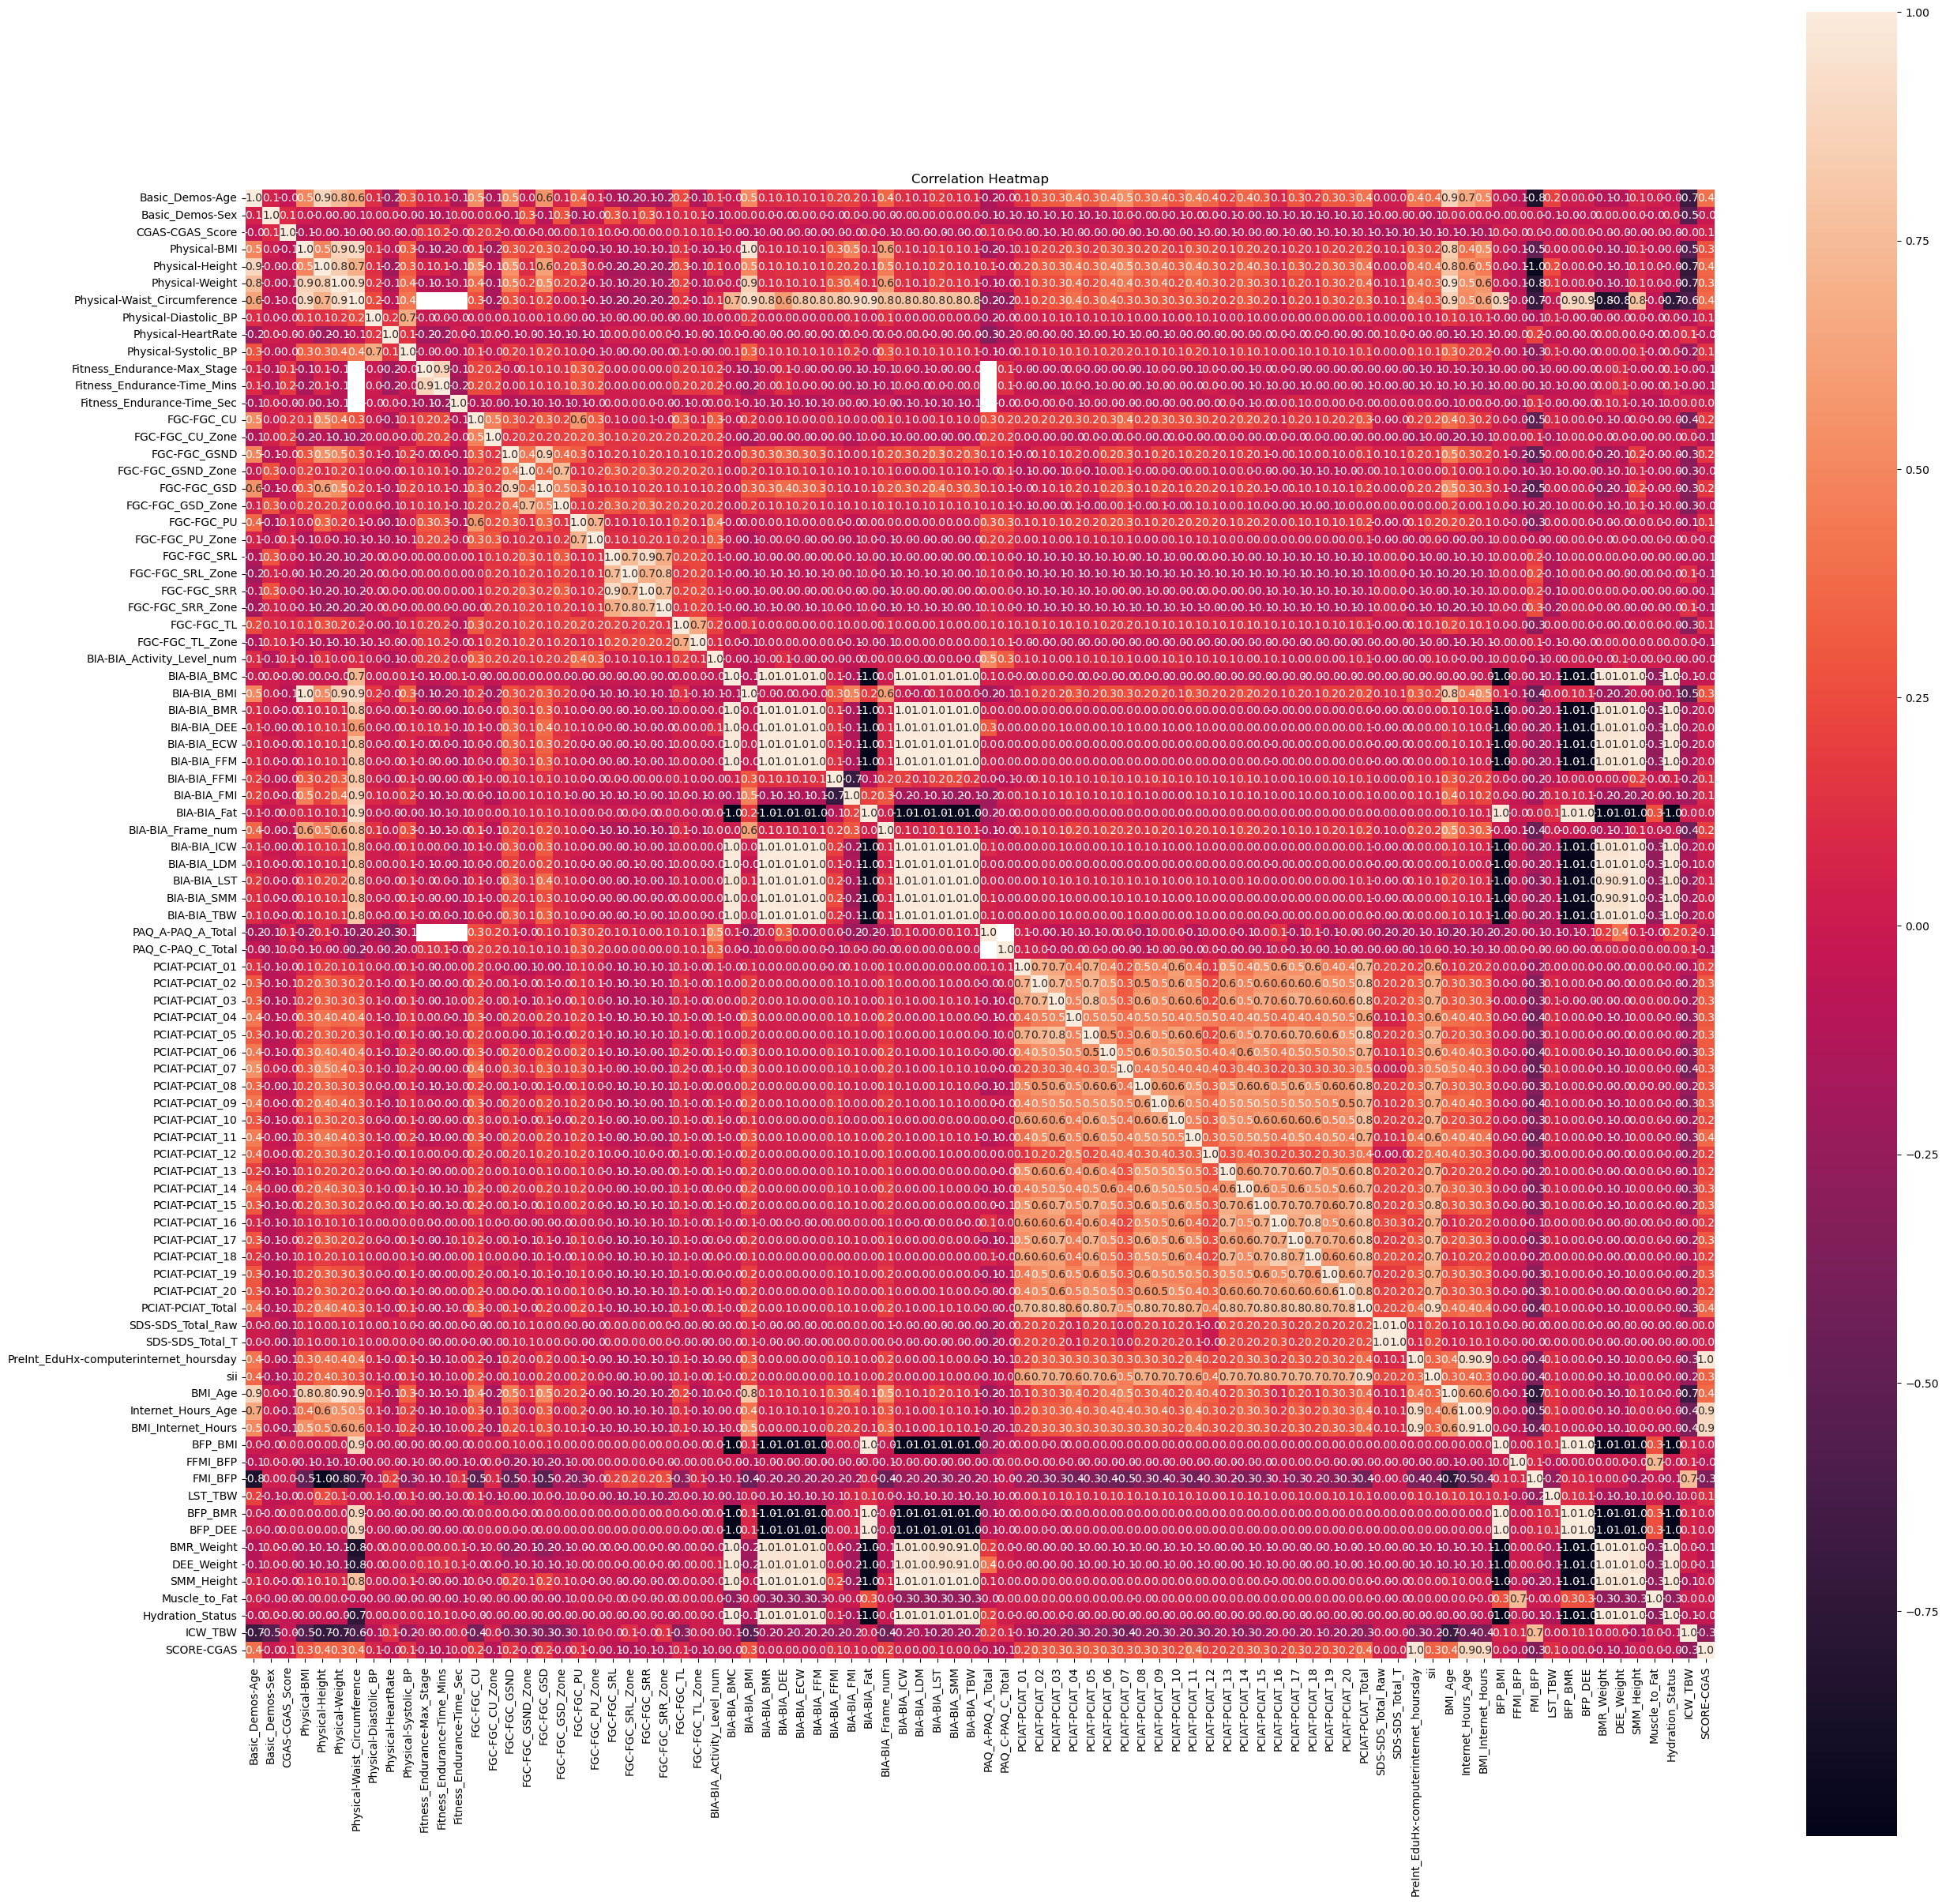

In [52]:
# Drop the 'id' column if present
train_data_no_id = train_df.drop(columns=['id'], errors='ignore')
# Calculate the correlation matrix
correlation_matrix = train_data_no_id.corr()
# Plot the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='rocket', square=True)
plt.title('Correlation Heatmap')
plt.show()

- From the Correlation Heatmap figure, we can see that most of the features that lost more than 50% of their value have no interaction with other features in train and test.

- Furthermore, from the above chart, we can see that the Waist circumference (in) index is highly correlated with the BIA-BIA index, so although this index has a missing value of up to 82.35%, it can be calculated from a standard Waist circumference formula from BMI, so we will keep this attribute.
Men: A formula based on BMI can be:
Waist circumference=0.74×BMI+12.5
Women: Similarly, for women, the formula can be used:
Waist circumference=0.75×BMI+13

In [55]:
for col in train_df.columns:
    missing_ratio = train_df[col].isnull().mean()
    if missing_ratio >= 0.47 and col != "Physical-Waist_Circumference":
        if col in test_df.columns:
            test_df = test_df.drop(columns = col, errors='ignore')
        train_df = train_df.drop(columns = col)
         

- Filling feature Physical-Waist_Circumference

In [57]:
def fill_waist_circumference(row):
    if pd.isnull(row['Physical-Waist_Circumference']):  # Kiểm tra nếu cột vòng eo thiếu
        if row['Basic_Demos-Sex'] == 0:
            return 0.74 * row['Physical-BMI'] + 12.5
        elif row['Basic_Demos-Sex'] == 1:
            return 0.75 * row['Physical-BMI'] + 13
    return row['Physical-Waist_Circumference']  # Nếu đã có giá trị vòng eo, không thay đổi
train_df['Physical-Waist_Circumference'] = train_df.apply(fill_waist_circumference, axis=1)
test_df['Physical-Waist_Circumference'] = test_df.apply(fill_waist_circumference, axis=1)

- After filling Physical Waist_Circumference we can use a KNN method to sort the rows by Physical Waist_Circumference and then fill the missing values by taking the median of the 3 nearest cells. This is a simple K-nearest neighbors (KNN) method, but instead of using a complex algorithm, you will choose to take the median of the rows nearest to Physical Waist_Circumference

In [113]:
def fill_with_median_train(df, bia_bia_prefix='BIA-BIA', waist_column='Physical-Waist_Circumference'):
    # Sắp xếp dữ liệu theo cột waist_column
    df_sorted = df.sort_values(by=waist_column).reset_index(drop=True)

    # Hàm để tính trung vị của 5 giá trị BIA-BIA gần nhất từ cột waist_column
    def get_median_of_nearest(index, data_waist, data_bia_bia):
        # Xác định phạm vi các giá trị gần nhất trong cột waist_column
        start = max(0, index - 300)
        end = min(len(data_waist), index + 301)
        
        # Lọc ra các row có giá trị BIA-BIA không bị missing
        nearest_values = data_bia_bia[start:end]
        nearest_waist_values = data_waist[start:end]
        
        # Lọc các giá trị BIA-BIA không bị missing
        valid_bia_bia_values = nearest_values[~nearest_values.isna()]
        
        # Kiểm tra nếu không có đủ giá trị để tính trung vị
        if len(valid_bia_bia_values) == 0:
            return np.nan  # Trả về NaN nếu không có giá trị hợp lệ
        
        # Tính trung vị của các giá trị BIA-BIA không bị missing
        return np.median(valid_bia_bia_values)

    # Điền các giá trị NaN của các cột bắt đầu bằng bia_bia_prefix
    for col in df.columns:
        if col.startswith(bia_bia_prefix):
            df[col] = df.apply(
                lambda row: get_median_of_nearest(
                    row.name, df_sorted[waist_column], df_sorted[col]) if pd.isna(row[col]) else row[col], axis=1)

    return df
def fill_with_median_test(df, bia_bia_prefix='BIA-BIA', waist_column='Physical-Waist_Circumference'):
    # Sắp xếp dữ liệu theo cột waist_column
    df_sorted = df.sort_values(by=waist_column).reset_index(drop=True)

    # Hàm để tính trung vị của 5 giá trị BIA-BIA gần nhất từ cột waist_column
    def get_median_of_nearest(index, data_waist, data_bia_bia):
        # Xác định phạm vi các giá trị gần nhất trong cột waist_column
        start = max(0, index - 2)
        end = min(len(data_waist), index + 3)
        
        # Lọc ra các row có giá trị BIA-BIA không bị missing
        nearest_values = data_bia_bia[start:end]
        nearest_waist_values = data_waist[start:end]
        
        # Lọc các giá trị BIA-BIA không bị missing
        valid_bia_bia_values = nearest_values[~nearest_values.isna()]
        
        # Kiểm tra nếu không có đủ giá trị để tính trung vị
        if len(valid_bia_bia_values) == 0:
            return np.nan  # Trả về NaN nếu không có giá trị hợp lệ
        
        # Tính trung vị của các giá trị BIA-BIA không bị missing
        return np.median(valid_bia_bia_values)

    # Điền các giá trị NaN của các cột bắt đầu bằng bia_bia_prefix
    for col in df.columns:
        if col.startswith(bia_bia_prefix):
            df[col] = df.apply(
                lambda row: get_median_of_nearest(
                    row.name, df_sorted[waist_column], df_sorted[col]) if pd.isna(row[col]) else row[col], axis=1)

    return df
    
train_df = fill_with_median_train(train_df)
test_df = fill_with_median_test(test_df)


- Similarly for features starting with FGC-FGC it will be most correlated with Basic_Demos-Age

In [124]:
train_df = fill_with_median_train(train_df, "FGC-FGC", "Basic_Demos-Age")
test_df = fill_with_median_test(test_df, "FGC-FGC", "Basic_Demos-Age")
train_df = feature_engineering(test_df)
test_df = feature_engineering(test_df)

In [126]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   id                                      20 non-null     string  
 1   Basic_Demos-Age                         20 non-null     float64 
 2   Basic_Demos-Sex                         20 non-null     category
 3   CGAS-CGAS_Score                         8 non-null      float64 
 4   Physical-BMI                            13 non-null     float64 
 5   Physical-Height                         13 non-null     float64 
 6   Physical-Weight                         13 non-null     float64 
 7   Physical-Waist_Circumference            13 non-null     float64 
 8   Physical-Diastolic_BP                   11 non-null     float64 
 9   Physical-HeartRate                      12 non-null     float64 
 10  Physical-Systolic_BP                    11 non-null 

In [120]:
display_missing(test_df, feature_cols)

PreInt_EduHx-computerinternet_hoursday has 20.00% missing values.
Physical-BMI has 35.00% missing values.
Physical-Height has 35.00% missing values.
Physical-Weight has 35.00% missing values.
CGAS-CGAS_Score has 60.00% missing values.
Physical-Waist_Circumference has 35.00% missing values.
Physical-Diastolic_BP has 45.00% missing values.
Physical-HeartRate has 40.00% missing values.
Physical-Systolic_BP has 45.00% missing values.
SDS-SDS_Total_Raw has 50.00% missing values.
SDS-SDS_Total_T has 50.00% missing values.


In [122]:
display_missing(train_df, feature_cols)

FGC-FGC_CU_Zone has 7.86% missing values.
FGC-FGC_PU_Zone has 7.86% missing values.
FGC-FGC_SRL_Zone has 7.93% missing values.
FGC-FGC_SRR_Zone has 7.89% missing values.
FGC-FGC_TL_Zone has 7.86% missing values.
BIA-BIA_Activity_Level_num has 8.22% missing values.
BIA-BIA_Frame_num has 8.22% missing values.
PreInt_EduHx-computerinternet_hoursday has 3.00% missing values.
Physical-BMI has 7.64% missing values.
Physical-Height has 7.53% missing values.
Physical-Weight has 5.99% missing values.
FGC-FGC_SRL has 7.60% missing values.
FGC-FGC_SRR has 7.57% missing values.
BIA-BIA_BMC has 8.22% missing values.
BIA-BIA_BMI has 8.22% missing values.
BIA-BIA_BMR has 8.22% missing values.
BIA-BIA_DEE has 8.22% missing values.
BIA-BIA_ECW has 8.22% missing values.
BIA-BIA_FFM has 8.22% missing values.
BIA-BIA_FFMI has 8.22% missing values.
BIA-BIA_FMI has 8.22% missing values.
BIA-BIA_Fat has 8.22% missing values.
BIA-BIA_ICW has 8.22% missing values.
BIA-BIA_LDM has 8.22% missing values.
BIA-BIA_

In [144]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   id                                      20 non-null     string  
 1   Basic_Demos-Age                         20 non-null     float64 
 2   Basic_Demos-Sex                         20 non-null     category
 3   CGAS-CGAS_Score                         8 non-null      float64 
 4   Physical-BMI                            13 non-null     float64 
 5   Physical-Height                         13 non-null     float64 
 6   Physical-Weight                         13 non-null     float64 
 7   Physical-Waist_Circumference            13 non-null     float64 
 8   Physical-Diastolic_BP                   11 non-null     float64 
 9   Physical-HeartRate                      12 non-null     float64 
 10  Physical-Systolic_BP                    11 non-null 